In [27]:
import json
import pandas as pd
from pprint import pprint
import numpy as np
import matplotlib.pyplot as pyplot
import http.client
#from config.py import api_key

In [9]:
import http.client 

conn = http.client.HTTPSConnection("api.gateway.attomdata.com") 

headers = { 
    'accept': "application/json", 
    'apikey': "0408aa05064b33cad67176d74f68c56a", 
} 

conn.request("GET", "/communityapi/v2.0.0/area/full?AreaId=CO13121", headers=headers) 
res = conn.getresponse() 
data = res.read() 
level = json.loads(data)
print(level)

{'response': {'inputparameter': {'AreaId': 'CO13121', 'package': 'full', 'resource': 'area', 'service': 'Community'}, 'result': {'package': {'descr': '', 'item': [{'age00_04': '78537', 'age05_09': '70058', 'age10_14': '65822', 'age15_19': '76806', 'age20_24': '68520', 'age25_29': '62416', 'age30_34': '72856', 'age35_39': '77732', 'age40_44': '75049', 'age45_49': '73196', 'age50_54': '70174', 'age55_59': '64872', 'age60_64': '55255', 'age65_69': '44838', 'age70_74': '31746', 'age75_79': '19647', 'age80_84': '11952', 'ageavepy_10': '39.00', 'ageavepy_5': '38.00', 'agegt85': '9370', 'aimcy25_44': '65226', 'aimcy45_64': '75134', 'aimcygt_65': '43916', 'aimcylt_25': '23965', 'airport': 'Hartsfield - Jackson Atlanta International', 'airportdist': '14', 'airx': '93', 'ancestamer': '52589', 'ancestamind': '1760', 'ancestasian': '60821', 'ancesteuro': '228132', 'ancesthawai': '330', 'ancesthisp': '80019', 'ancestother': '495469', 'ancestunclassified': '109726', 'avg_prop_tax': '2928', 'avg_prop

In [66]:
#Define the list for the desired zip codes
ZipCodes = ["30326", "30363", "30032", "30304", "30328", "30329"]

#initialize variables to store data for the desired attributes
airx_score = []
avg_exptotal = []
family_size = []
num_households = []
crime_score = []
education_number = []

#for loop to hit each zip code and pull data
for code in ZipCodes:
    
    conn = http.client.HTTPSConnection("api.gateway.attomdata.com")
     
    headers = { 
    'accept': "application/json", 
    'apikey': "0408aa05064b33cad67176d74f68c56a", 
    }
    
    conn.request("GET", f"/communityapi/v2.0.0/area/full?AreaID=ZI{code}", headers=headers) 
    
    res = conn.getresponse()
    data = res.read()
    level = json.loads(data)
    
    education_number.append(level["response"]["result"]["package"]["item"][0]["eduscoll"])
    family_size.append(level["response"]["result"]["package"]["item"][0]["famavesz"])
    num_households.append(level["response"]["result"]["package"]["item"][0]["hhdfam"])
    crime_score.append(level["response"]["result"]["package"]["item"][0]["cocrmcytotc"])
    airx_score.append(level["response"]["result"]["package"]["item"][0]["airx"])
    avg_exptotal.append(level["response"]["result"]["package"]["item"][0]["exptotal"])

print(education_number)
print(family_size)
print(num_households)
print(crime_score)
print(airx_score)
print(avg_exptotal)

KeyError: 'result'

In [58]:
df = pd.DataFrame({"Zip Codes": ZipCodes, "Air Quality Score": airx_score, "Average Total Expenditure": avg_exptotal, "Family Size": family_size,
                  "Num. Family Households": num_households, "Crime Score":
                  crime_score})
df

,Zip Codes,Air Quality Score,Average Total Expenditure,Family Size,Num. Family Households,Crime Score
0,30307,94,35705,3.00,4264,189
1,30316,94,36491,3.00,7430,189
2,30317,94,36912,4.00,3079,189
3,30313,94,27872,3.00,627,253
4,30342,92,41580,4.00,7412,253
5,30354,93,38733,4.00,4030,253
6,30303,94,21633,3.00,347,253
7,30319,93,36316,3.00,10475,189


In [ ]:
ZipCodes = ["30319", "30326", "30363", "30032", "30304", "30328", "30329", "30334", "30336", "30337"]

In [106]:
#I was not able to pul all 108 cases we wanted because the ATTOM site blocked me after frequently applying and using the API Key (over 100% utilization)
#In fact, I could only pull 7 cases at a time. I did this for 3 times (Total n=21) and copied data into an excel, which is then exported as a csv file
Project1_dataset = pd.read_csv('Project1_Dataset.csv')

In [113]:
Project1_dataset.head()

,Unnamed: 0,Zip Codes,Air Quality Score,Average Total Expenditure,Family Size,Num. Family Households,Crime Score
0,1,30318,93,34121,3,10750,253
1,2,30331,93,37722,4,15779,253
2,3,30315,94,36748,4,7092,253
3,4,30311,93,35189,4,8105,253
4,5,30310,93,35389,4,6125,253


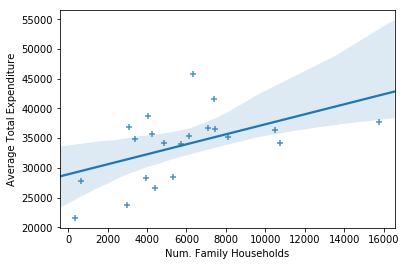

In [138]:
df = Project1_dataset
sns.regplot(x=df["Num. Family Households"], y=df["Average Total Expenditure"], marker="+")
plt.show()
#There is a strong positive linear that regions with greater number of family households have higher average total expenditure

Text(0, 0.5, 'Count of Zip Codes')

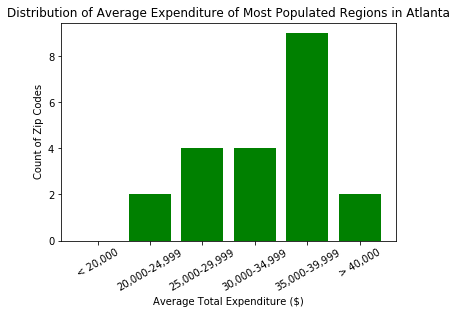

In [130]:
users = [0, 2, 4, 4, 9, 2]
x_axis = np.arange(len(users))
plt.bar(x_axis, users, color='green', align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["< 20,000", "20,000-24,999", "25,000-29,999", "30,000-34,999", "35,000-39,999", "> 40,000"], rotation=30)
plt.title("Distribution of Average Expenditure of Most Populated Regions in Atlanta")
plt.xlabel("Average Total Expenditure ($)")
plt.ylabel("Count of Zip Codes")

([<matplotlib.patches.Wedge at 0x1a21397e80>,
 [Text(-1.0136238354386793, 0.4272782702532171, '0-2,499'),
  Text(-0.6421180016297052, -0.8931318334843261, '2,500-4,999'),
  Text(1.0945338643771378, -0.1095245165780227, '5,000-7,499'),
  Text(0.3503351676748798, 1.042720130375459, '7,500-9,999'),
  Text(-0.4524159810784348, 1.0026563619031386, '> 10,000')],
 [Text(-0.5528857284210977, 0.2330608746835729, '9.5%'),
  Text(-0.35024618270711194, -0.48716281826417784, '33.3%'),
  Text(0.5970184714784387, -0.05974064540619419, '33.3%'),
  Text(0.19109190964084352, 0.5687564347502503, '9.5%'),
  Text(-0.24677235331550984, 0.5469034701289845, '14.3%')])

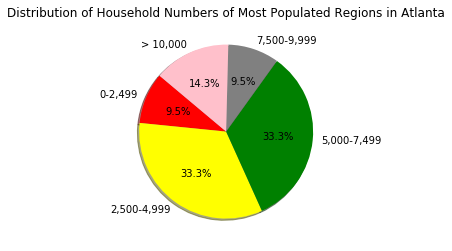

In [129]:
labels = ["0-2,499", "2,500-4,999", "5,000-7,499", "7,500-9,999", "> 10,000"]
sizes = [2, 7, 7, 2, 3]
colors = ["red", "yellow", "green", "grey", "pink"]
plt.title("Distribution of Household Numbers of Most Populated Regions in Atlanta")
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)